In [56]:
import gymnasium as gym
import numpy as np
from matplotlib import pyplot as plt

from src.agent import QLearningAgent
from src.env import DiceBlackJack


In [57]:
# hyperparameters
learning_rate = 0.1
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes * 0.5)  # reduce the exploration over time
final_epsilon = 0.0

env = DiceBlackJack()

agent = QLearningAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [58]:
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)
agent.train(env, n_episodes)

Training: 100%|██████████| 100000/100000 [00:41<00:00, 2406.59it/s]


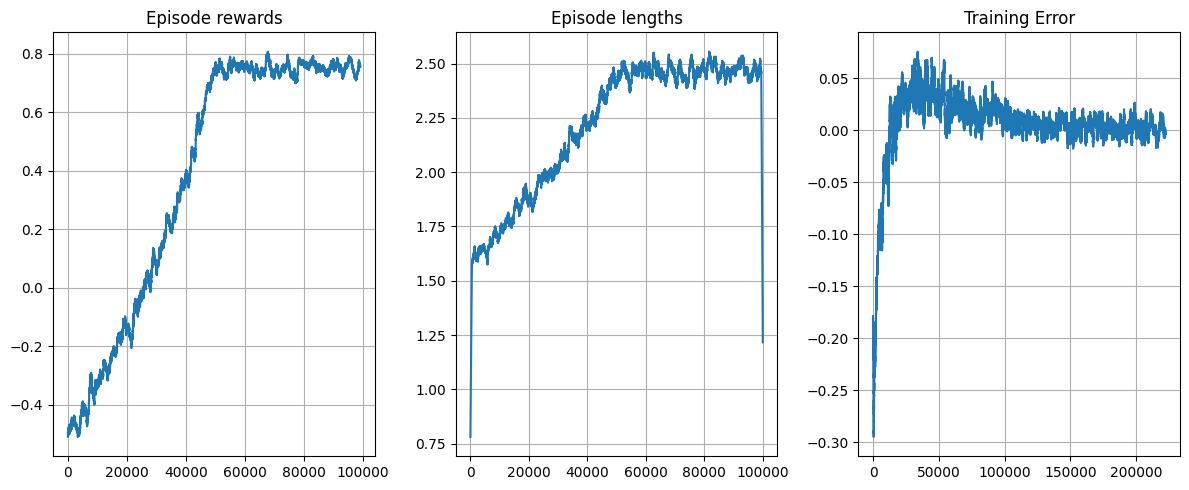

In [59]:
rolling_length = 1000
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
axs[0].set_title("Episode rewards")
axs[0].grid()
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
axs[1].grid()
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
axs[2].set_title("Training Error")
axs[2].grid()
training_error_moving_average = (
    np.convolve(
        np.array(agent.training_error), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
plt.tight_layout()
plt.show()